In [1]:
%load_ext autoreload
%autoreload 2

# ATT&CK DATASET

In [2]:
import pandas as pd
from paths import DATA_DIR

df = pd.read_csv(DATA_DIR / '03-04-January.csv')

/tmp/ipykernel_2944/2239220378.py:4: DtypeWarning: Columns (37) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(DATA_DIR / '03-04-January.csv')


In [3]:
df.shape

(8572, 82)

In [4]:
df.columns

Index(['_index', '_id', '_version', '_score', '_source.agent.ip',
       '_source.agent.name', '_source.agent.id', '_source.manager.name',
       '_source.data.audit.syscall', '_source.data.audit.gid',
       '_source.data.audit.fsgid', '_source.data.audit.session',
       '_source.data.audit.pid', '_source.data.audit.suid',
       '_source.data.audit.type', '_source.data.audit.uid',
       '_source.data.audit.egid', '_source.data.audit.exe',
       '_source.data.audit.file.inode', '_source.data.audit.file.mode',
       '_source.data.audit.file.name', '_source.data.audit.sgid',
       '_source.data.audit.id', '_source.data.audit.key',
       '_source.data.audit.auid', '_source.data.audit.execve.a1',
       '_source.data.audit.execve.a2', '_source.data.audit.execve.a0',
       '_source.data.audit.euid', '_source.data.audit.command',
       '_source.data.audit.ppid', '_source.data.audit.fsuid',
       '_source.data.audit.exit', '_source.data.audit.cwd',
       '_source.data.audit.success

In [5]:
len(df[df['_source.rule.mitre.tactic'].notna() & (df['_source.rule.mitre.tactic'] != ' ')])

45

In [6]:
df['_source.rule.mitre.tactic'][0]

' '

In [7]:
df["_source.full_log"][0]

'type=SYSCALL msg=audit(1704304027.612:3126): arch=c000003e syscall=59 success=yes exit=0 a0=55add673b8c0 a1=55add6790cb0 a2=55add688d700 a3=7fffd2f82c20 items=2 ppid=1 pid=4284 auid=4294967295 uid=0 gid=0 euid=0 suid=0 fsuid=0 egid=0 sgid=0 fsgid=0 tty=(none) ses=4294967295 comm="systemd-user-ru" exe="/usr/lib/systemd/systemd-user-runtime-dir" subj=unconfined key="audit-wazuh-c"\x1dARCH=x86_64 SYSCALL=execve AUID="unset" UID="root" GID="root" EUID="root" SUID="root" FSUID="root" EGID="root" SGID="root" FSGID="root" type=EXECVE msg=audit(1704304027.612:3126): argc=3 a0="/lib/systemd/systemd-user-runtime-dir" a1="start" a2="1000" type=CWD msg=audit(1704304027.612:3126): cwd="/" type=PATH msg=audit(1704304027.612:3126): item=0 name="/lib/systemd/systemd-user-runtime-dir" inode=273552 dev=08:03 mode=0100755 ouid=0 ogid=0 rdev=00:00 nametype=NORMAL cap_fp=0 cap_fi=0 cap_fe=0 cap_fver=0 cap_frootid=0\x1dOUID="root" OGID="root" type=PATH msg=audit(1704304027.612:3126): item=1 name="/lib64/ld

In [8]:
import re

def parse_audit_log(log):
    data = {}
    
    # Extract timestamp
    timestamp_match = re.search(r'audit\((\d+\.\d+):\d+\)', log)
    data['timestamp'] = timestamp_match.group(1) if timestamp_match else None
    
    # Extract success status
    success_match = re.search(r'success=(\w+)', log)
    data['success'] = (1 if success_match.group(1) == 'yes' else 0) if success_match else None
    
    # Extract UID, EUID, AUID
    uid_match = re.search(r'uid=(\d+)', log)
    euid_match = re.search(r'euid=(\d+)', log)
    auid_match = re.search(r'auid=(\d+)', log)
    
    data['uid'] = uid_match.group(1) if uid_match else None
    data['euid'] = euid_match.group(1) if euid_match else None
    data['auid'] = auid_match.group(1) if auid_match else None
    
    # Extract process IDs
    ppid_match = re.search(r'ppid=(\d+)', log)
    pid_match = re.search(r'pid=(\d+)', log)
    
    data['ppid'] = ppid_match.group(1) if ppid_match else None
    data['pid'] = pid_match.group(1) if pid_match else None
    
    # Extract command
    command_match = re.search(r'comm="([^"]+)"', log)
    data['command'] = command_match.group(1) if command_match else None
    
    # Extract arguments
    args_match = re.findall(r'a\d+="([^"]+)"', log)
    data['arguments'] = args_match if args_match else None
    
    # Extract CWD
    cwd_match = re.search(r'type=CWD.*?cwd="([^"]+)"', log)
    data['CWD'] = cwd_match.group(1) if cwd_match else None
    
    return data

# Example usage
audit_log = 'type=SYSCALL msg=audit(1704304027.612:3126): arch=c000003e syscall=59 success=yes exit=0 a0=55add673b8c0 a1=55add6790cb0 a2=55add688d700 a3=7fffd2f82c20 items=2 ppid=1 pid=4284 auid=4294967295 uid=0 gid=0 euid=0 suid=0 fsuid=0 egid=0 sgid=0 fsgid=0 tty=(none) ses=4294967295 comm="systemd-user-ru" exe="/usr/lib/systemd/systemd-user-runtime-dir" subj=unconfined key="audit-wazuh-c"\x1dARCH=x86_64 SYSCALL=execve AUID="unset" UID="root" GID="root" EUID="root" SUID="root" FSUID="root" EGID="root" SGID="root" FSGID="root" type=EXECVE msg=audit(1704304027.612:3126): argc=3 a0="/lib/systemd/systemd-user-runtime-dir" a1="start" a2="1000" type=CWD msg=audit(1704304027.612:3126): cwd="/"'

print(parse_audit_log(audit_log))

{'timestamp': '1704304027.612', 'success': 1, 'uid': '4294967295', 'euid': '0', 'auid': '4294967295', 'ppid': '1', 'pid': '1', 'command': 'systemd-user-ru', 'arguments': ['/lib/systemd/systemd-user-runtime-dir', 'start', '1000'], 'CWD': '/'}


In [9]:
logs = df["_source.full_log"].to_list()

In [10]:
logs[:3]

['type=SYSCALL msg=audit(1704304027.612:3126): arch=c000003e syscall=59 success=yes exit=0 a0=55add673b8c0 a1=55add6790cb0 a2=55add688d700 a3=7fffd2f82c20 items=2 ppid=1 pid=4284 auid=4294967295 uid=0 gid=0 euid=0 suid=0 fsuid=0 egid=0 sgid=0 fsgid=0 tty=(none) ses=4294967295 comm="systemd-user-ru" exe="/usr/lib/systemd/systemd-user-runtime-dir" subj=unconfined key="audit-wazuh-c"\x1dARCH=x86_64 SYSCALL=execve AUID="unset" UID="root" GID="root" EUID="root" SUID="root" FSUID="root" EGID="root" SGID="root" FSGID="root" type=EXECVE msg=audit(1704304027.612:3126): argc=3 a0="/lib/systemd/systemd-user-runtime-dir" a1="start" a2="1000" type=CWD msg=audit(1704304027.612:3126): cwd="/" type=PATH msg=audit(1704304027.612:3126): item=0 name="/lib/systemd/systemd-user-runtime-dir" inode=273552 dev=08:03 mode=0100755 ouid=0 ogid=0 rdev=00:00 nametype=NORMAL cap_fp=0 cap_fi=0 cap_fe=0 cap_fver=0 cap_frootid=0\x1dOUID="root" OGID="root" type=PATH msg=audit(1704304027.612:3126): item=1 name="/lib64/l

In [11]:
parsed_logs = [parse_audit_log(log) for log in logs[:100]]

In [12]:
parsed_logs

[{'timestamp': '1704304027.612',
  'success': 1,
  'uid': '4294967295',
  'euid': '0',
  'auid': '4294967295',
  'ppid': '1',
  'pid': '1',
  'command': 'systemd-user-ru',
  'arguments': ['/lib/systemd/systemd-user-runtime-dir', 'start', '1000'],
  'CWD': '/'},
 {'timestamp': None,
  'success': None,
  'uid': '1000',
  'euid': None,
  'auid': None,
  'ppid': None,
  'pid': None,
  'command': None,
  'arguments': None,
  'CWD': None},
 {'timestamp': '1704304029.764',
  'success': 1,
  'uid': '1000',
  'euid': '0',
  'auid': '1000',
  'ppid': '4282',
  'pid': '4282',
  'command': 'sh',
  'arguments': ['sh', '-c'],
  'CWD': '/'},
 {'timestamp': '1704304029.888',
  'success': 0,
  'uid': '1000',
  'euid': '0',
  'auid': '1000',
  'ppid': '4294',
  'pid': '4294',
  'command': 'env',
  'arguments': None,
  'CWD': '/'},
 {'timestamp': '1704304029.972',
  'success': 1,
  'uid': '1000',
  'euid': '0',
  'auid': '1000',
  'ppid': '4296',
  'pid': '4296',
  'command': '00-header',
  'arguments': 

In [13]:
parsed_logs = [parse_audit_log(log) for log in logs]
target = [1 if i != " " else 0 for i in df['_source.rule.mitre.tactic'].to_list()]

In [14]:
len(parsed_logs)

8572

In [15]:
len(target)

8572

In [16]:
sum(target)

45

In [17]:
set(target)

{0, 1}

In [19]:
data = [{"target": t, "log": l} for t, l in zip(target, parsed_logs)]

In [20]:
import json

with open(DATA_DIR / 'parsed_logs.json', 'w') as f:
    for item in data[:10]:
        f.write(json.dumps(item) + '\n')

In [21]:
from pathlib import Path
a = Path("data/03-04-January.csv")
a.stem

'03-04-January'

# Afer labelling

In [94]:
import json
def load_json_long(path):
    with open(path, "r", encoding="utf-8") as f:
        return [json.loads(line) for line in f.readlines()]

In [95]:
from paths import DATA_DIR, ROOT_DIR
data = load_json_long(DATA_DIR / "parsed_data_labelled/03-04-January.json")

In [96]:
import numpy as np

data = np.array(data)

In [97]:
data.shape

(8478,)

In [98]:
data[0]

{'id': 1,
 'target': 0.0,
 'content': {'timestamp': '1704304027.612',
  'success': 1,
  'uid': '4294967295',
  'euid': '0',
  'syscall': '0',
  'ppid': '1',
  'pid': '1',
  'command': 'systemd-user-ru',
  'arguments': ['/lib/systemd/systemd-user-runtime-dir', 'start', '1000'],
  'CWD': '/'}}

In [99]:
data = sorted(data, key= lambda x: x["content"]["timestamp"])

In [100]:
data[0]

{'id': 477,
 'target': 0.1,
 'content': {'timestamp': '1704303002.205',
  'success': 1,
  'uid': '0',
  'euid': '0',
  'syscall': '0',
  'ppid': '4067',
  'pid': '4067',
  'command': 'sh',
  'arguments': ['/bin/sh', '-c'],
  'CWD': '/root'}}

In [101]:
targets = np.array([x["target"] for x in data])
features = np.array([x["content"] for x in data])

In [102]:
features[0]

{'timestamp': '1704303002.205',
 'success': 1,
 'uid': '0',
 'euid': '0',
 'syscall': '0',
 'ppid': '4067',
 'pid': '4067',
 'command': 'sh',
 'arguments': ['/bin/sh', '-c'],
 'CWD': '/root'}

In [103]:
first_time = features[0]["timestamp"]
first_time

'1704303002.205'

In [104]:
def create_command_string(command:str , args:list):
    """
    Create a command string from the command and arguments.
    """
    if args:
        args = " ".join(args)
        return args
    else:
        return command

In [105]:
for i, f in enumerate(features):
    if f["command"] is not None:
        features[i]["command"] = create_command_string(f["command"], f["arguments"])
    else:
        features[i]["command"] = None

In [106]:
features[1190]

{'timestamp': '1704304166.688',
 'success': 0,
 'uid': '4294967295',
 'euid': '0',
 'syscall': '0',
 'ppid': '4734',
 'pid': '4734',
 'command': 'wazuh-modulesd',
 'arguments': None,
 'CWD': '/var/ossec'}

In [107]:
def assess_cwd_risk(cwd):
    if not cwd:
        return 3  # Treat None as high risk

    cwd = cwd.strip().lower()

    high_risk = [
        "/root", "/etc", "/bin", "/sbin", "/lib", "/lib64", "/dev",
        "/snap", "/lost+found", "/initrd", "/var/lib", "/var/cache", "/"
    ]
    medium_risk = [
        "/var", "/tmp", "/run", "/srv", "/proc", "/sys", "/var/log", "/var/tmp"
    ]
    low_risk = [
        "/home", "/usr", "/opt", "/boot", "/media", "/mnt"
    ]

    # Match longest prefix
    for path in high_risk:
        if cwd.startswith(path):
            return 2
    for path in medium_risk:
        if cwd.startswith(path):
            return 1
    for path in low_risk:
        if cwd.startswith(path):
            return 0

    return 3  # Default conservative fallback

def rank_cwd_risk(dataset):
    for entry in dataset:
        cwd = entry.get("CWD")
        score = assess_cwd_risk(cwd)
        entry["cwd_risk_score"] = score
    return dataset

features = rank_cwd_risk(features)

In [108]:
import json
with open(str(ROOT_DIR / "bash_commands.json"), "r", encoding="utf-8") as f:
    lines = f.readlines()
lines = [json.loads(line) for line in lines]    

In [109]:
BASH_COMMANDS = [f.get("command") for f in lines]

In [110]:
def is_bash_command(command: str):
    if not command:
        return 0  # Treat None as high risk
    
    if "/" in command.split()[0]:
        if any(f in BASH_COMMANDS + ["sh"] for f in command.split()[0].split("/")):
            return 1
    else:
        if command in BASH_COMMANDS + ["sh"]:
            return 1
    return 0

def get_bash_commands(dataset):
    for entry in dataset:
        command = entry.get("command")
        score = is_bash_command(command)
        entry["is_bash"] = score
    return dataset

features = get_bash_commands(features)

In [111]:
def flag_count(command: str):
    if not command:
        return 0  # Treat None as high risk
    
    command = command.split()[1:]
    return sum(1 for part in command if part.startswith('-'))
    

def get_flag_ammount(dataset):
    for entry in dataset:
        command = entry.get("command")
        score = flag_count(command)
        entry["flag_count"] = score
    return dataset

features = get_flag_ammount(features)

In [112]:
def args_count(command: str):
    if not command:
        return 0  # Treat None as high risk
    
    command = command.split()[1:]
    return len(command)
    

def get_args_ammount(dataset):
    for entry in dataset:
        command = entry.get("command")
        score = max([args_count(command) - entry.get("flag_count"), 0])
        entry["args_counts"] = score
    return dataset

features = get_args_ammount(features)

In [113]:
a[640]

{'timestamp': '1704304159.380',
 'success': 1,
 'uid': '4294967295',
 'euid': '0',
 'syscall': '0',
 'ppid': '4734',
 'pid': '4734',
 'command': 'findmnt --kernel /var/log/audit',
 'arguments': ['findmnt', '--kernel', '/var/log/audit'],
 'CWD': '/var/ossec',
 'cwd_risk_score': 2,
 'is_bash': 0,
 'flag_count': 1,
 'args_counts': 1}

In [114]:
commands = [
    "ls -la /home/user",
    "rm -rf /var/log",
    "cd /etc/nginx",
    "mkdir new_folder",
]

from transformers import AutoTokenizer, AutoModel
import torch

tokenizer = AutoTokenizer.from_pretrained("microsoft/codebert-base")
model = AutoModel.from_pretrained("microsoft/codebert-base")

def embed_command(cmd):
    inputs = tokenizer(cmd, return_tensors="pt", truncation=True, padding=True)
    outputs = model(**inputs)
    return torch.mean(outputs.last_hidden_state, dim=1).detach().numpy()

X = np.array([embed_command(c) for c in commands])


In [115]:
X.shape

(4, 1, 768)

In [116]:
X.reshape(4, -1).shape

(4, 768)

In [117]:
X = X.reshape(X.shape[0], -1)

In [118]:
X.shape

(4, 768)

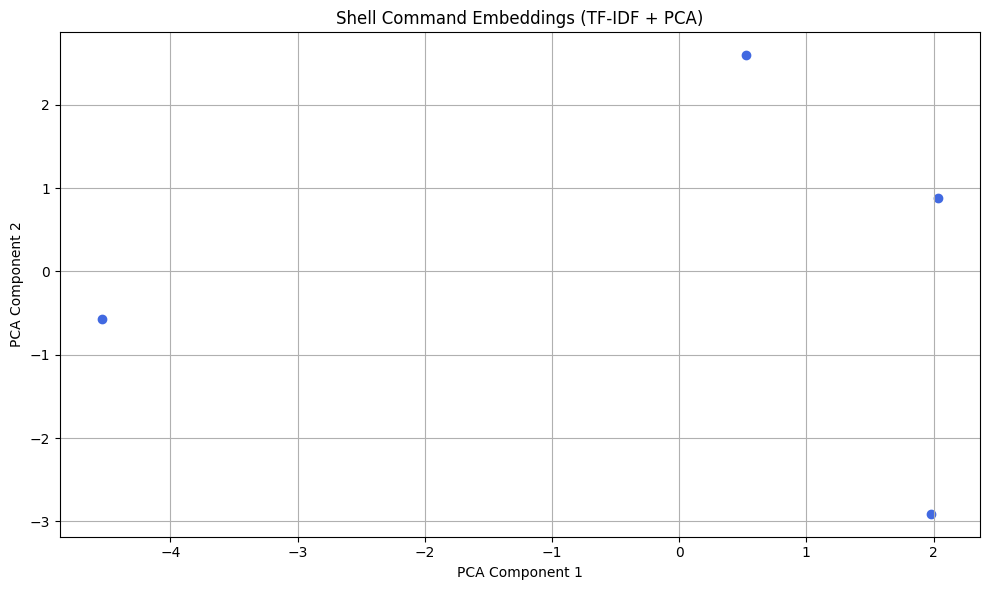

In [37]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Step 3: Plot the results
plt.figure(figsize=(10, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], color='royalblue')

plt.title("Shell Command Embeddings (TF-IDF + PCA)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.grid(True)
plt.tight_layout()
plt.show()

In [38]:
test_commands = [f.get('command') for f in features[:1000]]

In [39]:
X = np.array([embed_command(c) for c in test_commands])
X = X.reshape(X.shape[0], -1)

/tmp/ipykernel_106690/4242969236.py:10: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap("tab10", len(set(color_labels)))  # Get colormap


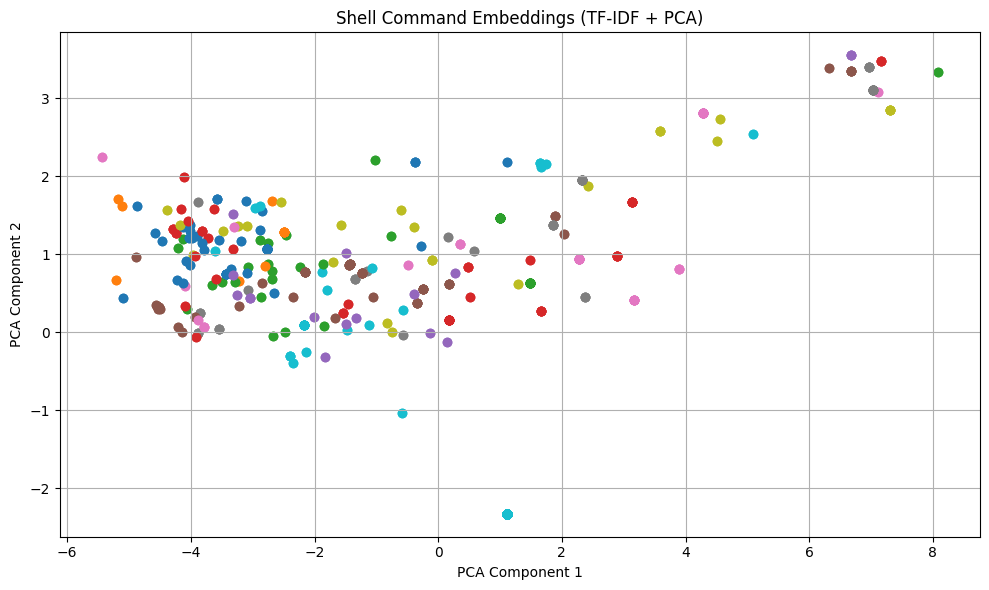

In [40]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder

base_cmds = [cmd.split()[0] for cmd in test_commands]

# Encode command names as color labels
label_encoder = LabelEncoder()
color_labels = label_encoder.fit_transform(base_cmds)
colors = plt.cm.get_cmap("tab10", len(set(color_labels)))  # Get colormap

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Plot with color based on command type
plt.figure(figsize=(10, 6))
for i, (x, y) in enumerate(X_pca):
    plt.scatter(x, y, color=colors(color_labels[i]), label=base_cmds[i] if base_cmds[i] not in base_cmds[:i] else "")

plt.title("Shell Command Embeddings (TF-IDF + PCA)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.grid(True)

# Show legend with base commands
#plt.legend(title="Base Command", loc="best", fontsize=9)
plt.tight_layout()
plt.show()

In [131]:
from transformers import AutoTokenizer, AutoModel
import torch
from src.shared.batch import batch_iterable
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

tokenizer = AutoTokenizer.from_pretrained("microsoft/codebert-base")
model = AutoModel.from_pretrained("microsoft/codebert-base").to(device)

def embed_command(batch):
    global model, tokenizer, device
    inputs = tokenizer(batch, return_tensors="pt", truncation=True, padding=True).to(device)
    with torch.no_grad():  # Disable gradients for efficiency
        outputs = model(**inputs)
    return torch.mean(outputs.last_hidden_state, dim=1).cpu().numpy()

def get_embedded_command(dataset, batch_size=100):
    batches = batch_iterable(dataset, batch_size)
    results = []
    for batch in batches:
        embedded = embed_command([entry.get("command") for entry in batch])
        results.append(embedded)
    results = np.concatenate(results, axis=0)
    
    for entry, rez in zip(dataset, results):
        entry["embedded_command"] = rez
    return dataset

Using device: cuda


In [132]:
len(features)

8478

In [137]:
features = get_embedded_command(features, batch_size=2)

Results shape: (8478, 768)


In [ ]:
features[50]

In [136]:
a[-1]

{'timestamp': '1704389381.832',
 'success': 1,
 'uid': '4294967295',
 'euid': '0',
 'syscall': '0',
 'ppid': '4445',
 'pid': '4445',
 'command': 'last -n 20',
 'arguments': ['last', '-n', '20'],
 'CWD': '/var/ossec',
 'cwd_risk_score': 2,
 'is_bash': 0,
 'flag_count': 1,
 'args_counts': 1,
 'embedded_command': array([ 3.89957242e-02,  6.76860511e-02, -4.06487212e-02,  3.79165977e-01,
         3.52680653e-01, -1.60822310e-02,  1.73413992e-01, -1.22559234e-01,
         6.54260218e-02,  1.58444941e-01,  1.82796463e-01,  5.48911512e-01,
         5.17428294e-02, -1.22915938e-01,  3.90575707e-01, -1.75688356e-01,
         1.28427893e-01,  3.03879917e-01,  5.39129898e-02,  3.57765928e-02,
         6.13689683e-02, -3.67849052e-01,  3.44147444e-01, -1.46441698e-01,
         1.56386077e-01,  1.65049821e-01,  3.46613169e-01,  5.13865352e-01,
        -7.01946020e-02,  8.72281551e-01, -8.87818784e-02, -1.91392154e-01,
         2.05523992e+00, -3.23523968e-01,  1.24634311e-01, -9.60312635e-02,
     

In [ ]:
for i in features:
    i["embedded_command"] = list(i["embedded_command"].astype(np.float16))

In [145]:
for i in features:
    i["embedded_command"] = [float(a) for a in i["embedded_command"]]

In [146]:
features[0]

{'timestamp': '1704303002.205',
 'success': 1,
 'uid': '0',
 'euid': '0',
 'syscall': '0',
 'ppid': '4067',
 'pid': '4067',
 'command': '/bin/sh -c',
 'arguments': ['/bin/sh', '-c'],
 'CWD': '/root',
 'cwd_risk_score': 2,
 'is_bash': 1,
 'flag_count': 1,
 'args_counts': 0,
 'embedded_command': [-0.2174072265625,
  0.30810546875,
  0.275390625,
  0.1912841796875,
  0.040679931640625,
  -0.62451171875,
  -0.1387939453125,
  -0.00897979736328125,
  0.09979248046875,
  0.471435546875,
  -0.2425537109375,
  0.857421875,
  -0.06121826171875,
  -0.1602783203125,
  0.60400390625,
  0.36669921875,
  -0.04547119140625,
  0.339599609375,
  0.2431640625,
  0.29638671875,
  0.03961181640625,
  -0.291015625,
  0.77978515625,
  -0.47998046875,
  0.4287109375,
  0.35595703125,
  0.1949462890625,
  0.56005859375,
  -0.064208984375,
  0.64306640625,
  -0.11956787109375,
  -0.154296875,
  1.740234375,
  -0.191162109375,
  0.46044921875,
  -0.1907958984375,
  0.00753021240234375,
  0.32666015625,
  0.0896

In [147]:
X = [{"target": a, "content": b, "id": i} for i, (a, b) in enumerate(zip(targets, features))]

In [148]:
from src.shared.json_tools import write_json_long

write_json_long(X, "test_data.json")